### Model Eight using Ridge

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

#### Read in both Training CSV and Test CSV for Kaggle

In [4]:
modelnum = 'eight_ridge'

In [5]:
# read in Training csv
df = pd.read_csv('../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [6]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,...,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,...,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,...,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,...,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,...,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


#### Useful for EDA

In [7]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [8]:
# Convert column names to lowercase
df.columns = map(str.lower,df.columns)
# Replace ' ' with '_' in column names
df.columns = df.columns.str.replace(' ','_')
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


#### Impute null values and convert categorical data to numeric.

1. Convert Categorical (nominal) data to numeric using *le.fit_transform*
1. Convert Categorical (ordinal) data to numeric using *map* function### Identify Features to Use

In [9]:
# To Training df

# Convert column names to lowercase
df.columns = map(str.lower,df.columns)
# Replace ' ' with '_' in column names
df.columns = df.columns.str.replace(' ','_')
df.head()

df['alley'] = le.fit_transform(df['alley'])
df['bldg_type'] = le.fit_transform(df['bldg_type'])
df['central_air'] = le.fit_transform(df['central_air'])
df['condition_1'] = le.fit_transform(df['condition_1'])
df['condition_2'] = le.fit_transform(df['condition_2'])
df['electrical'] = le.fit_transform(df['electrical'])
df['exterior_1st'] = le.fit_transform(df['exterior_1st'])
df['exterior_2nd'] = le.fit_transform(df['exterior_2nd'])
df['foundation'] = le.fit_transform(df['foundation'])
df['garage_finish'] = le.fit_transform(df['garage_finish'])
df['garage_type'] = le.fit_transform(df['garage_type'])
df['heating'] = le.fit_transform(df['heating'])
df['house_style'] = le.fit_transform(df['house_style'])
df['land_contour'] = le.fit_transform(df['land_contour'])
df['lot_config'] = le.fit_transform(df['lot_config'])
df['ms_zoning'] = le.fit_transform(df['ms_zoning'])
df['mas_vnr_type'] = le.fit_transform(df['mas_vnr_type'])
df['misc_feature'] = le.fit_transform(df['misc_feature'])
df['neighborhood'] = le.fit_transform(df['neighborhood'])
df['roof_matl'] = le.fit_transform(df['roof_matl'])
df['roof_style'] = le.fit_transform(df['roof_style'])
df['sale_type'] = le.fit_transform(df['sale_type'])
df['street'] = le.fit_transform(df['street'])

df['kitchen_qual_num'] = df['kitchen_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['land_slope_num'] = df['land_slope'].map({'Gtl': 2, 'Mod':1, 'Sev': 0})
df['exter_qual_num'] = df['exter_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df['exter_cond_num'] = df['exter_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df['bsmt_qual_num'] = df['bsmt_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['bsmt_cond_num'] = df['bsmt_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['bsmt_exposure_num'] = df['bsmt_exposure'].map({'Gd': 5, 'Av':4, 'Mn': 3, 'No':2, 'NA':1})
df['bsmtfin_type_1_num'] = df['bsmtfin_type_1'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['bsmtfin_type_2_num'] = df['bsmtfin_type_2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['heating_qc_num'] = df['heating_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['electrical_num'] = df['electrical'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['functional_num'] = df['functional'].map({'Typ': 7, 'Min2':6, 'Min1': 5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df['fireplace_qu_num'] = df['fireplace_qu'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['garage_qual_num'] = df['garage_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['garage_cond_num'] = df['garage_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['paved_drive_num'] = df['paved_drive'].map({'Y': 2, 'P':1, 'N': 0})
df['pool_qc_num'] = df['pool_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'NA':1})
df['fence_num'] = df['fence'].map({'GdPrv': 5, 'MnPrv':4, 'GdWo': 3, 'MnWw':2, 'NA':1})
df['lot_shape_num'] = df['lot_shape'].map({'Reg': 3, 'IR1':2, 'IR2': 1, 'IR3':0})
df['utilities_num'] = df['utilities'].map({'AllPub': 3, 'NoSewr':2, 'NoSeWa': 1, 'ELO':0})

In [10]:
# To Test df

# Convert column names to lowercase
df_test.columns = map(str.lower,df_test.columns)
# Replace ' ' with '_' in column names
df_test.columns = df_test.columns.str.replace(' ','_')
df_test.head()

df_test['alley'] = le.fit_transform(df_test['alley'])
df_test['bldg_type'] = le.fit_transform(df_test['bldg_type'])
df_test['central_air'] = le.fit_transform(df_test['central_air'])
df_test['condition_1'] = le.fit_transform(df_test['condition_1'])
df_test['condition_2'] = le.fit_transform(df_test['condition_2'])
df_test['electrical'] = le.fit_transform(df_test['electrical'])
df_test['exterior_1st'] = le.fit_transform(df_test['exterior_1st'])
df_test['exterior_2nd'] = le.fit_transform(df_test['exterior_2nd'])
df_test['foundation'] = le.fit_transform(df_test['foundation'])
df_test['garage_finish'] = le.fit_transform(df_test['garage_finish'])
df_test['garage_type'] = le.fit_transform(df_test['garage_type'])
df_test['heating'] = le.fit_transform(df_test['heating'])
df_test['house_style'] = le.fit_transform(df_test['house_style'])
df_test['land_contour'] = le.fit_transform(df_test['land_contour'])
df_test['lot_config'] = le.fit_transform(df_test['lot_config'])
df_test['ms_zoning'] = le.fit_transform(df_test['ms_zoning'])
df_test['mas_vnr_type'] = le.fit_transform(df_test['mas_vnr_type'])
df_test['misc_feature'] = le.fit_transform(df_test['misc_feature'])
df_test['neighborhood'] = le.fit_transform(df_test['neighborhood'])
df_test['roof_matl'] = le.fit_transform(df_test['roof_matl'])
df_test['roof_style'] = le.fit_transform(df_test['roof_style'])
df_test['sale_type'] = le.fit_transform(df_test['sale_type'])
df_test['street'] = le.fit_transform(df_test['street'])

df_test['kitchen_qual_num'] = df_test['kitchen_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['land_slope_num'] = df_test['land_slope'].map({'Gtl': 2, 'Mod':1, 'Sev': 0})
df_test['exter_qual_num'] = df_test['exter_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df_test['exter_cond_num'] = df_test['exter_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df_test['bsmt_qual_num'] = df_test['bsmt_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['bsmt_cond_num'] = df_test['bsmt_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['bsmt_exposure_num'] = df_test['bsmt_exposure'].map({'Gd': 5, 'Av':4, 'Mn': 3, 'No':2, 'NA':1})
df_test['bsmtfin_type_1_num'] = df_test['bsmtfin_type_1'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['bsmtfin_type_2_num'] = df_test['bsmtfin_type_2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['heating_qc_num'] = df_test['heating_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['electrical_num'] = df_test['electrical'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['functional_num'] = df_test['functional'].map({'Typ': 7, 'Min2':6, 'Min1': 5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_test['fireplace_qu_num'] = df_test['fireplace_qu'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['garage_qual_num'] = df_test['garage_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['garage_cond_num'] = df_test['garage_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['paved_drive_num'] = df_test['paved_drive'].map({'Y': 2, 'P':1, 'N': 0})
df_test['pool_qc_num'] = df_test['pool_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'NA':1})
df_test['fence_num'] = df_test['fence'].map({'GdPrv': 5, 'MnPrv':4, 'GdWo': 3, 'MnWw':2, 'NA':1})
df_test['lot_shape_num'] = df_test['lot_shape'].map({'Reg': 3, 'IR1':2, 'IR2': 1, 'IR3':0})
df_test['utilities_num'] = df_test['utilities'].map({'AllPub': 3, 'NoSewr':2, 'NoSeWa': 1, 'ELO':0})

3. Replace *nan* with mean of column

In [11]:
# Replace NA with mean
# To Training

df['bsmt_cond_num'] = df['bsmt_cond_num'].fillna(df['bsmt_cond_num'].mean())
df['bsmt_exposure_num'] = df['bsmt_exposure_num'].fillna(df['bsmt_exposure_num'].mean())
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(df['bsmt_full_bath'].mean())
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna(df['bsmt_half_bath'].mean())
df['bsmt_qual_num'] = df['bsmt_qual_num'].fillna(df['bsmt_qual_num'].mean())
df['bsmt_unf_sf'] = df['bsmt_unf_sf'].fillna(df['bsmt_unf_sf'].mean())
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].fillna(df['bsmtfin_sf_1'].mean())
df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].fillna(df['bsmtfin_sf_2'].mean())
df['bsmtfin_type_1_num'] = df['bsmtfin_type_1_num'].fillna(df['bsmtfin_type_1_num'].mean())
df['bsmtfin_type_2_num'] = df['bsmtfin_type_2_num'].fillna(df['bsmtfin_type_2_num'].mean())
df['garage_area'] = df['garage_area'].fillna(df['garage_area'].mean())
df['garage_cars'] = df['garage_cars'].fillna(df['garage_cars'].mean())
df['garage_cond_num'] = df['garage_cond_num'].fillna(df['garage_cond_num'].mean())
df['garage_qual_num'] = df['garage_qual_num'].fillna(df['garage_qual_num'].mean())
df['garage_yr_blt'] = df['garage_yr_blt'].fillna(df['garage_yr_blt'].mean())
df['mas_vnr_area'] = df['mas_vnr_area'].fillna(df['mas_vnr_area'].mean())
df['fireplace_qu_num'] = df['fireplace_qu_num'].fillna(df['fireplace_qu_num'].mean())
df['lot_frontage'] = df['lot_frontage'].fillna(df['lot_frontage'].mean())
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(df['total_bsmt_sf'].mean())

# To Testing

df_test['bsmt_cond_num'] = df_test['bsmt_cond_num'].fillna(df_test['bsmt_cond_num'].mean())
df_test['bsmt_exposure_num'] = df_test['bsmt_exposure_num'].fillna(df_test['bsmt_exposure_num'].mean())
df_test['bsmt_full_bath'] = df_test['bsmt_full_bath'].fillna(df_test['bsmt_full_bath'].mean())
df_test['bsmt_half_bath'] = df_test['bsmt_half_bath'].fillna(df_test['bsmt_half_bath'].mean())
df_test['bsmt_qual_num'] = df_test['bsmt_qual_num'].fillna(df_test['bsmt_qual_num'].mean())
df_test['bsmt_unf_sf'] = df_test['bsmt_unf_sf'].fillna(df_test['bsmt_unf_sf'].mean())
df_test['bsmtfin_sf_1'] = df_test['bsmtfin_sf_1'].fillna(df_test['bsmtfin_sf_1'].mean())
df_test['bsmtfin_sf_2'] = df_test['bsmtfin_sf_2'].fillna(df_test['bsmtfin_sf_2'].mean())
df_test['bsmtfin_type_1_num'] = df_test['bsmtfin_type_1_num'].fillna(df_test['bsmtfin_type_1_num'].mean())
df_test['bsmtfin_type_2_num'] = df_test['bsmtfin_type_2_num'].fillna(df_test['bsmtfin_type_2_num'].mean())
df_test['garage_area'] = df_test['garage_area'].fillna(df_test['garage_area'].mean())
df_test['garage_cars'] = df_test['garage_cars'].fillna(df_test['garage_cars'].mean())
df_test['garage_cond_num'] = df_test['garage_cond_num'].fillna(df_test['garage_cond_num'].mean())
df_test['garage_qual_num'] = df_test['garage_qual_num'].fillna(df_test['garage_qual_num'].mean())
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].fillna(df_test['garage_yr_blt'].mean())
df_test['mas_vnr_area'] = df_test['mas_vnr_area'].fillna(df_test['mas_vnr_area'].mean())
df_test['fireplace_qu_num'] = df_test['fireplace_qu_num'].fillna(df_test['fireplace_qu_num'].mean())
df_test['lot_frontage'] = df_test['lot_frontage'].fillna(df_test['lot_frontage'].mean())
df_test['total_bsmt_sf'] = df_test['total_bsmt_sf'].fillna(df_test['total_bsmt_sf'].mean())

#### EDA & Feature Selection

In [12]:
# Top 10
df.corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice           1.000000
overall_qual        0.800207
exter_qual_num      0.712146
gr_liv_area         0.697038
kitchen_qual_num    0.692336
bsmt_qual_num       0.667041
garage_area         0.650246
garage_cars         0.648197
total_bsmt_sf       0.628668
1st_flr_sf          0.618486
year_built          0.571849
year_remod/add      0.550370
full_bath           0.537969
garage_yr_blt       0.516738
mas_vnr_area        0.508602
Name: saleprice, dtype: float64

In [13]:
# Bottom 5
df.corr()['saleprice'].sort_values(ascending=False).tail(5)

pid              -0.255052
lot_shape_num    -0.294542
garage_type      -0.427721
garage_finish    -0.557839
electrical_num         NaN
Name: saleprice, dtype: float64

In [14]:
# to df

df['overall_qual_squared'] = (df['overall_qual'] ** 2) 
df['quality_and_age'] = df['overall_qual'] * df['year_remod/add']
df['house_total_sq'] = df['total_bsmt_sf'] + df['gr_liv_area']
df['sqrt_1st_sq'] = (df['1st_flr_sf']**2)
df['overall_qual_liv_area'] = df['overall_qual'] * df['gr_liv_area']
df['year_remod_or_built'] = df['year_remod/add'] * df['year_built']
df['kitch_qual_and_age'] = df['kitchen_qual'] * df['year_remod/add']
df['year_remod_or_built_sq'] = (df['year_remod_or_built'] ** 2)
df['exterior_cond_and_qual'] = df['exter_cond_num'] * df['exter_qual_num']

# to df_test

df_test['overall_qual_squared'] = (df_test['overall_qual'] ** 2) 
df_test['quality_and_age'] = df_test['overall_qual'] * df_test['year_remod/add']
df_test['house_total_sq'] = df_test['total_bsmt_sf'] + df_test['gr_liv_area']
df_test['sqrt_1st_sq'] = (df_test['1st_flr_sf']**2)
df_test['overall_qual_liv_area'] = df_test['overall_qual'] * df_test['gr_liv_area']
df_test['year_remod_or_built'] = df_test['year_remod/add'] * df_test['year_built']
df_test['kitch_qual_and_age'] = df_test['kitchen_qual'] * df_test['year_remod/add']
df_test['year_remod_or_built_sq'] = (df_test['year_remod_or_built'] ** 2)
df_test['exterior_cond_and_qual'] = df_test['exter_cond_num'] * df_test['exter_qual_num']

#### Modeling

In [15]:
features = ['overall_qual_liv_area', 'overall_qual_squared', 'quality_and_age', 'overall_qual', 'house_total_sq', 'exter_qual_num', 'gr_liv_area', 'kitchen_qual_num', 'bsmt_qual_num', 'garage_area',
           'garage_cars', 'total_bsmt_sf', 'year_remod_or_built', 'year_remod_or_built_sq', 'garage_finish', 'exterior_cond_and_qual']

X = df[features]
y = df['saleprice']

In [16]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=45)

In [17]:
# Instantiate and scale data

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_validate_sc = sc.transform(X_validate)

In [18]:
# np.logspace generates 100 values equally between 0 and 5

alphas = np.logspace(0, 5, 100)

# then converts them to alphas between 10^0 and 10^5
ridge_cv = RidgeCV(alphas = alphas, cv=5)

# Cross-validate over our list of ridge alphas

ridge_cv.fit(X_train_sc, y_train);

# Fit model using best ridge alpha

In [19]:
# Here is the optimal value of alpha
ridge_cv.alpha_

132.19411484660287

In [21]:
ridge_cv.best_score_

0.8186210899698168

#### Scores

In [22]:
# R2 Training Score, R2 Test Score
ridge_cv.score(X_train_sc, y_train), ridge_cv.score(X_validate_sc, y_validate)

(0.8227839238533589, 0.8102843511657684)

#### Predictions

In [23]:
preds = ridge_cv.predict(X_validate_sc)
preds;

In [24]:
# Residuals
residuals = y_validate - preds

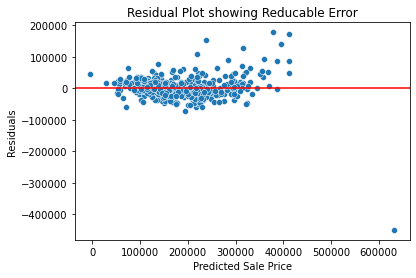

In [25]:
# Plot residuals to evaluate Epsilon
# This exhibits a heteroscedastic distribution, as the points are not quite uniform when scanning left to right
# meaning there is more opportunity to reduce error

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

1531.041259742079

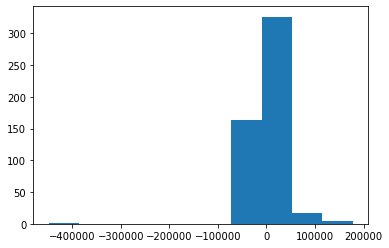

In [26]:
# Residual Histogram
# This is close to a normal distribution, but not quite... and does not have a mean of 0
# Therefore, there is more reducable error within the model to address

plt.hist(residuals, bins=10)
residuals.mean()

In [28]:
test_preds = ridge_cv.predict(df_test[features])

df_test['SalePrice'] = test_preds

df_test.rename(columns={'id': 'Id'}, inplace=True)

kaggle_submission = df_test[['Id', 'SalePrice']]

kaggle_submission.set_index('Id', inplace=True)

In [29]:
# Save Kaggle Submission to CSV

kaggle_submission.to_csv(f'../kaggle_submissions/model_{modelnum}.csv')

In [30]:
# Save df to CSV

df[features].to_csv(f'../clean_data/model_{modelnum}.csv', index=0)